# Min Max Normalization vs Standardization
$$ Min-Max Normalization = \frac{X-X_{min}}{X_{max}-X_{min}} $$
$$ Z score Standardization = \frac{X-X_{\mu}}{\sigma} $$
$$ Normalization = \frac{X-X_{\mu}}{X_{max}-X_{min}} $$
$$ Box Cox $$
![title](img/boxcox.PNG)


How to choose between the two:
* Choose normalization: 
    Smoother gradient descent: All the features are transformed into the same range (0-1). Hence gradient updates for all features are similar. Even in neural network, normalization is used extensively (batch normalization)
* Choose standardization:
    Outlier Handling: Standardization spread isnt constrained to 0-1. Hence outliers dont come too close to the distribution. Explained below.
* Normalization:
    Doesnt change the distribution (check code)
* Power transformation:
    Box Cox: Tries to make the distribution gaussian (no guarantee). Used for techniques which require normal distribution eg. Anova. Have not gone into details.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("./../LogRegression/data/ex2data1.txt", names=['Sub1','Sub2','Pass'])#header=None)
Y= df['Pass']
X = df.drop('Pass', axis=1)


Text(0.5, 1.0, '1.0')

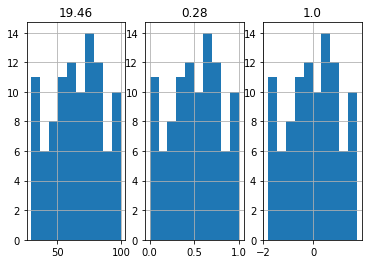

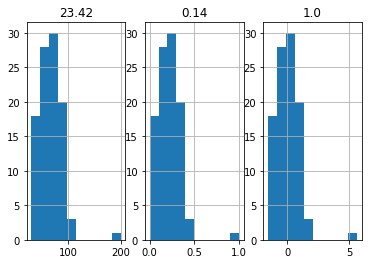

In [7]:
def norm(X):
    X = (X-X.min())/(X.max()-X.min())
    return X

def std(X):
    X = (X-X.mean())/X.std()
    return X

Xoriginal = X['Sub1']
Xnorm = norm(Xoriginal)
Xstd = std(Xoriginal)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
Xoriginal.hist(ax = ax1)
ax1.set_title(np.round(Xoriginal.std(),2))
Xnorm.hist(ax = ax2)
ax2.set_title(np.round(Xnorm.std(),2))
Xstd.hist(ax = ax3)
ax3.set_title(np.round(Xstd.std(),2))

X['Sub1'][0] = 200
Xoriginal = X['Sub1']
Xnorm = norm(Xoriginal)
Xstd = std(Xoriginal)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
Xoriginal.hist(ax = ax1)
ax1.set_title(np.round(Xoriginal.std(),2))
Xnorm.hist(ax = ax2)
ax2.set_title(np.round(Xnorm.std(),2))
Xstd.hist(ax = ax3)
ax3.set_title(np.round(Xstd.std(),2))

If we scale using min max normalization, our data get squeezed (the standard deviation is low. Hence if our data has outlier they might not be distinct after normalization)
In the above plot, for Min-Max, our data is between 0-0.5 and outlier is near ~1. 
For std, our data is between ~-2.5-2.5 and outlier at 5. Thus it is spread better. 

https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html

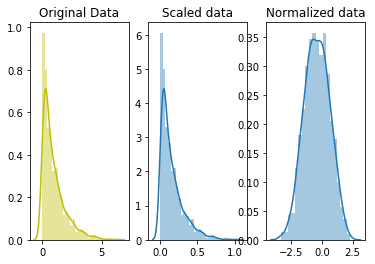

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from scipy import stats

original_data = np.random.exponential(size = 1000)
scaled_data = minmax_scale(original_data)
# norm_data = (original_data-np.mean(original_data))/(max(original_data)-min(original_data))
norm_data = stats.boxcox(original_data)
# plot both together to compare
fig, ax=plt.subplots(1,3)
sns.distplot(original_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
sns.distplot(norm_data[0], ax=ax[2]) #
ax[2].set_title("Normalized data")
plt.show()